In [20]:
# import import libraries

In [21]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [22]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [23]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<AxesSubplot:>

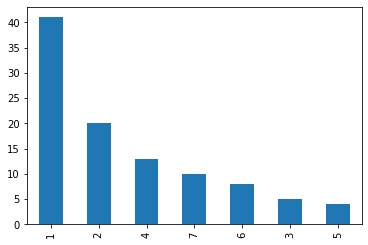

In [24]:
# plotting bar graph
zoo['type'].value_counts().plot(kind = 'bar')
# type 1 is greater in number compared to other types 

In [25]:
# standardizing the data 
std_zoo = pd.DataFrame(preprocessing.StandardScaler().fit_transform(zoo.iloc[:,1:17]))
std_zoo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [26]:
# splitting x and y
x = std_zoo
y = zoo.iloc[:,17]

In [27]:
k_value = np.array(range(1,41))
param_grid = dict(n_neighbors = k_value)

In [28]:
# finding best k value 
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid=param_grid,cv=10).fit(x,y)
best_k_value = grid.best_params_
best_k_value

{'n_neighbors': 1}

In [29]:
# knn model 
knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn,x,y,cv=10)
cross_valscore = np.mean(score)
cross_valscore

0.9509090909090909

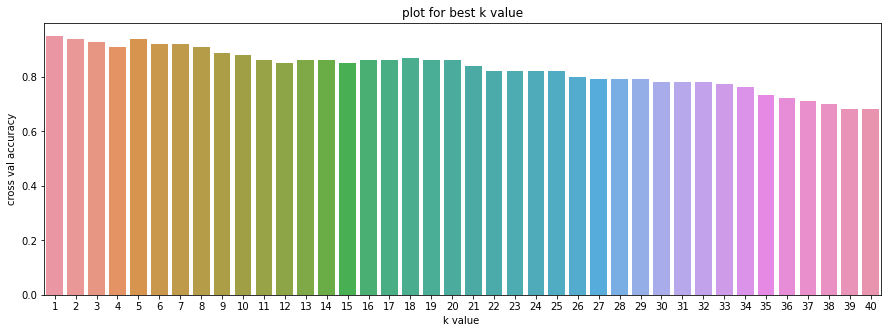

In [30]:
plt.figure(figsize=(15,5))
score_k =[]
for m in k_value:
    mod = KNeighborsClassifier(m)
    c = cross_val_score(mod , x,y, cv=10)
    score_k.append(np.mean(c))
sns.barplot(k_value,score_k) 
plt.xlabel('k value ')
plt.ylabel('cross val accuracy')
plt.title('plot for best k value')
plt.show()

<AxesSubplot:>

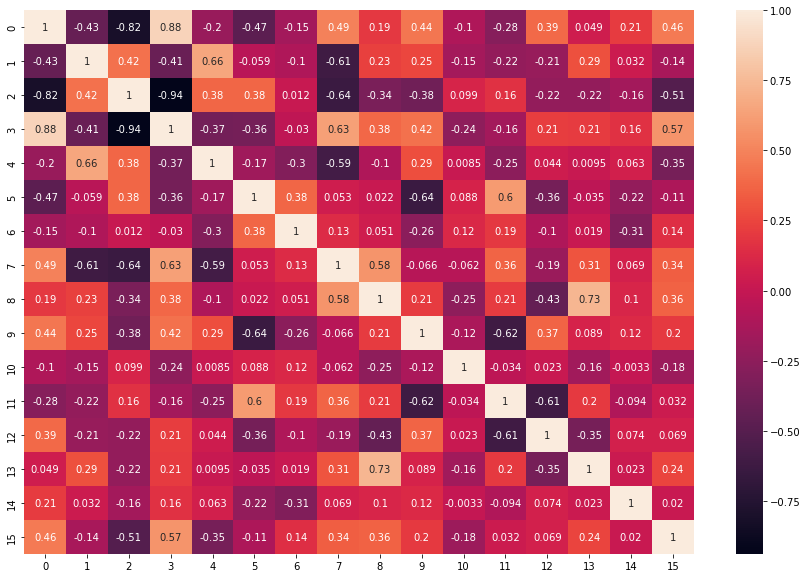

In [31]:
# plotting confusion_matrix using heatmap
confusion_matrix = std_zoo.corr()
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix,annot=True)